In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [82]:
## KNN

In [20]:
df = pd.read_csv('envios_productos.csv', sep = ';')

In [21]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [22]:
print(df.shape)

(10999, 12)


In [23]:
df.isna().count()

ID                     10999
Warehouse_block        10999
Mode_of_Shipment       10999
Customer_care_calls    10999
Customer_rating        10999
Cost_of_the_Product    10999
Prior_purchases        10999
Product_importance     10999
Gender                 10999
Discount_offered       10999
Weight_in_gms          10999
Reached.on.Time_Y.N    10999
dtype: int64

In [24]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [25]:
df = df.drop(['ID'], axis=1)

In [26]:
df = df.rename(columns={'Reached.on.Time_Y.N':'Reached_on_Time_Y_N'})

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
punto_nuevo = {'Weight_in_gms': [2000],
               'Cost_of_the_Product': [220]}

In [99]:
punto_nuevo = pd.DataFrame(punto_nuevo)

<AxesSubplot:xlabel='Weight_in_gms', ylabel='Cost_of_the_Product'>

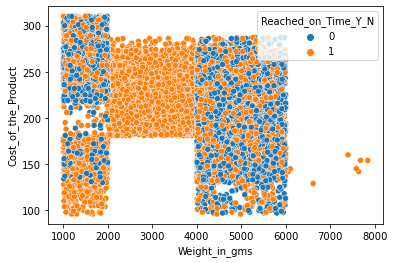

In [100]:
sns.scatterplot(data=df, x="Weight_in_gms", y="Cost_of_the_Product", hue='Reached_on_Time_Y_N')

In [103]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
X = df[['Weight_in_gms', 'Cost_of_the_Product']]
y = df[['Reached_on_Time_Y_N']]

knn.fit(X, y)

C:\Users\josed\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [104]:
prediccion = knn.predict(punto_nuevo)
print(prediccion)

[1]


In [83]:
#RANDOM FOREST

In [65]:
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [46]:
X = df.drop('Reached_on_Time_Y_N', axis=1) 
y = df.Reached_on_Time_Y_N

In [66]:
df_dummy = pd.get_dummies(df)
df_dummy

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,4,2,177,3,44,1233,1,0,0,0,1,0,1,0,0,0,1,0,1,0
1,4,5,216,2,59,3088,1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,2,2,183,4,48,3374,1,1,0,0,0,0,1,0,0,0,1,0,0,1
3,3,3,176,4,10,1177,1,0,1,0,0,0,1,0,0,0,0,1,0,1
4,2,2,184,3,46,2484,1,0,0,1,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1,1,0,0,0,0,0,0,1,0,0,1,1,0
10995,4,1,232,5,6,1247,0,0,1,0,0,0,0,0,1,0,0,1,1,0
10996,5,4,242,5,4,1155,0,0,0,1,0,0,0,0,1,0,1,0,1,0
10997,5,2,223,6,2,1210,0,0,0,0,0,1,0,0,1,0,0,1,0,1


In [67]:
X = df_dummy.drop('Reached_on_Time_Y_N', axis=1)
y = df_dummy.Reached_on_Time_Y_N

In [68]:
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

In [69]:
tree = DecisionTreeClassifier(random_state=11)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [70]:
y_test_pred = tree.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Test
test_accuracy_DT = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy_DT)

% de aciertos sobre el set de evaluación: 0.6415151515151515


In [72]:
#Creamos un random forest!
model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

In [73]:
y_test_pred = model.predict(X_test)

In [74]:
#Calculo el accuracy en Test
test_accuracy_RF = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy_RF)

% de aciertos sobre el set de evaluación: 0.6618181818181819


In [75]:
print('% de aciertos sobre el set de evaluación para DT:',test_accuracy_DT)
print('% de aciertos sobre el set de evaluación para RF:',test_accuracy_RF)

% de aciertos sobre el set de evaluación para DT: 0.6415151515151515
% de aciertos sobre el set de evaluación para RF: 0.6618181818181819
